In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 22})

# diagonal polarization

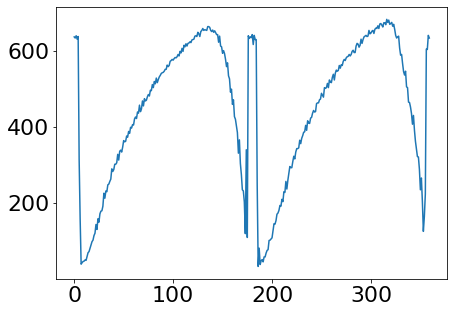

In [3]:
path = "../data/E_3_run1.csv"

data = np.genfromtxt(path)
plt.figure(figsize=(7,5))
plt.plot(data)
plt.show()

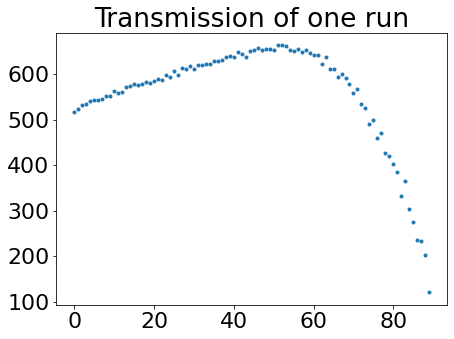

In [4]:
plt.figure(figsize=(7,5))
plt.title("Transmission of one run")
correction = 6
plt.plot(data[(90-correction):(180-correction)], ".")
plt.show()

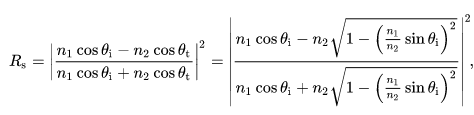

In [5]:
def R_s(t, n_2, n_1 = 1):
    """t in degrees"""
    T = t*2*np.pi/360
    
    return np.abs((n_1*np.cos(T) - n_2*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2))/(n_1*np.cos(T) + n_2*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)))**2

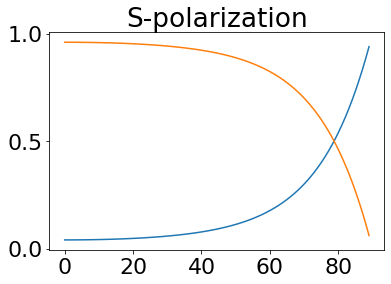

In [6]:
deg = np.linspace(0, 89, 90)

plt.title("S-polarization")
plt.plot(deg, R_s(deg, n_2=1.5))
plt.plot(deg, 1-R_s(deg, n_2=1.5))
plt.show()

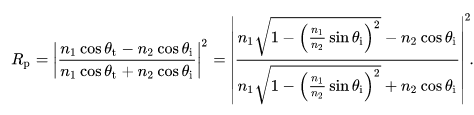

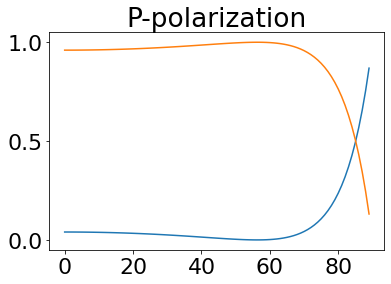

In [7]:
def R_p(t, n_2, n_1 = 1):
    """t in degrees"""
    T = t*2*np.pi/360
    
    return np.abs((n_1*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2) - n_2*np.cos(T))/(n_1*np.sqrt(1- (n_1*np.sin(T)/n_2)**2) + n_2*np.cos(T)))**2

deg = np.linspace(0, 89, 90)

plt.title("P-polarization")
plt.plot(deg, R_p(deg, n_2=1.5))
plt.plot(deg, 1-R_p(deg, n_2=1.5))
plt.show()

In [8]:
def transmission(t, n_2, theta, A):
    """theta is the angle of polarization from the floor in degrees"""
    theta = theta*2*np.pi/360
    Rs = R_s(t, n_2)
    Rp = R_p(t, n_2)
    
    return A*((np.sin(theta)**2 * (1-Rs)) + (np.cos(theta)**2 * (1-Rp)))

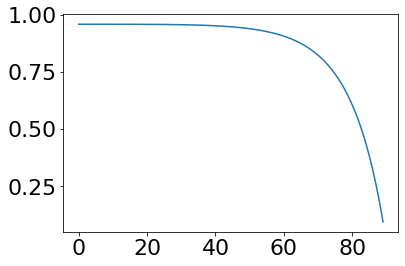

In [9]:
plt.plot(transmission(deg, 1.5, 46, A=1))
plt.show()

# fit to the data

## one datafile

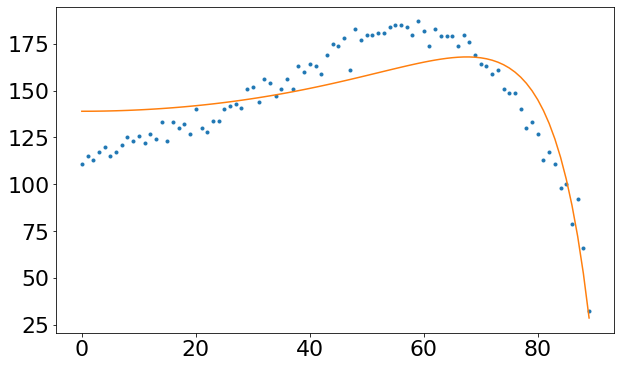

[2.42324819e+00 1.07378653e-03 1.68045697e+02]


In [10]:
path = "../data/E_3.csv"

data = np.genfromtxt(path)

d = data[(90-correction):(180-correction)]#/max(data[(90-correction):(180-correction)])

popt, pcov = curve_fit(transmission, xdata=deg, ydata=d, p0=[1.5, 45, 200])

f = plt.figure(figsize=(10,6))
plt.plot(deg, d, ".", label="Data")
plt.plot(deg, transmission(deg, popt[0], popt[1], popt[2]), label="Fit")
plt.show()
print(popt)

## all good datafiles

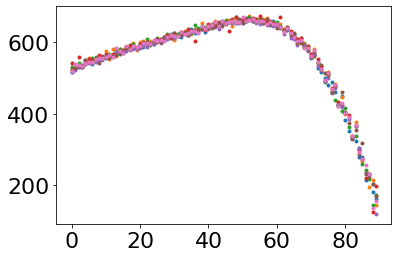

In [75]:
paths = ["../data/E_3_intensity_1700.csv",
         "../data/E_3_intensity_1700_run2.csv",
         "../data/E_3_intensity_1700_run3.csv",
         "../data/E_3_intensity_1700_run4.csv",
         "../data/E_3_run1.csv",
         "../data/E_3_intensity_2500.csv",
         "../data/E_3_intensity_3500.csv",
        ]
full_data = np.zeros((len(paths), 90))
correction = 6
for i, path in enumerate(paths):
    data = np.genfromtxt(path)
    d = data[(90-correction):(180-correction)]
    plt.plot(deg, d, ".")
    
    full_data[i] = d

plt.show()

/tmp/ipykernel_3985/1430618864.py:9: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_t = np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)
/tmp/ipykernel_3985/1430618864.py:3: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_t = np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)
/tmp/ipykernel_3985/1430618864.py:22: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_t = np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)


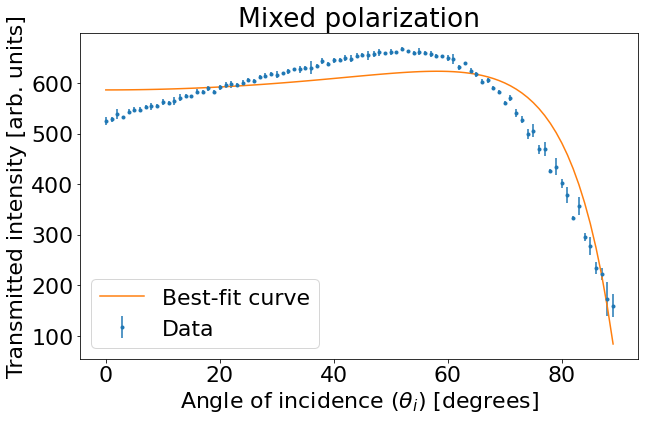

1.8212479619175657 1.9414231416800278
108.40842323610238 83.82020269598804


In [76]:
mean = np.mean(full_data, axis=0)
A = max(mean)
#mean = mean/A
#mean = mean/1024
err = np.std(full_data, axis=0)#/1024

popt, pcov = curve_fit(transmission, xdata=deg, ydata=mean, sigma=err, p0=[1.5, 45, 600])
perr = np.diag(np.sqrt(pcov))

plt.figure(figsize=(10,6))
plt.errorbar(deg, mean, err, fmt=".", label="Data")
plt.plot(deg, transmission(deg, popt[0], popt[1], popt[2]), label="Best-fit curve")
plt.title("Mixed polarization")
plt.xlabel(r"Angle of incidence ($\theta_i$) [degrees]")
plt.ylabel("Transmitted intensity [arb. units]")
plt.legend()
plt.show()

print(popt[0], perr[0])
print(popt[1], perr[1])

In [77]:
resid_m = (mean - transmission(deg, popt[0], popt[1], popt[2]))/err

print(chi2(mean, transmission(deg, popt[0], popt[1], popt[2]), err))

6165.875900866676


/home/yuliya/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


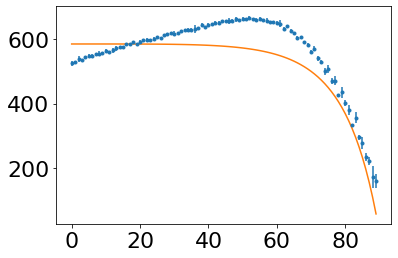

[  1.69103384  45.         626.01999345]


In [13]:
def trans2(t, n_2, theta,A):
    """theta is the angle of polarization from the floor in degrees"""
    theta = theta*2*np.pi/360
    Rs = R_s(t, n_2)
    Rp = R_p(t, n_2)
    
    return A*(1-Rp)

popt, pcov = curve_fit(trans2, xdata=deg, ydata=mean, sigma=err, p0=[1.5, 45, 600])

plt.errorbar(deg, mean, err, fmt=".")
plt.plot(deg, transmission(deg, popt[0], popt[1], popt[2]))
plt.show()

print(popt)

# Try again: Adding the transmittances at the end

In [14]:
def t_p(t, n_2, n_1=1):
    T = t*2*np.pi/360
    cos_theta_t = np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)
    
    return 2*n_1*np.cos(T)/(n_2*np.cos(T)+n_1*cos_theta_t)

def t_s(t, n_2, n_1=1):
    T = t*2*np.pi/360
    cos_theta_t = np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)
    
    return 2*n_1*np.cos(T)/(n_1*np.cos(T)+n_2*cos_theta_t)

def transmission(t, n_2, phi, A):
    """phi is the angle of polarization from the floor in degrees"""
    phi = phi*2*np.pi/360 # turn to rad
    n_1 =1 # index of refraction of air
    
    ts = np.abs(t_s(t, n_2))
    tp = np.abs(t_p(t, n_2))
    
    T = t*2*np.pi/360
    cos_theta_t = np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)
    
    # transmission coef squared for mixed polarization
    t2 = np.cos(phi)**2 * ts**2 + np.sin(phi)**2 * tp**2
    
    return A*t2*(n_2*cos_theta_t)/(n_1*np.cos(T))

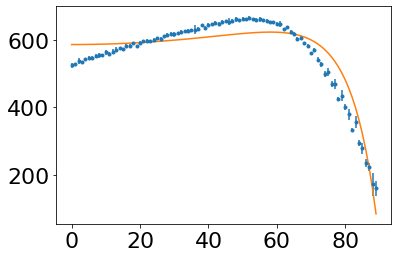

[1.82127863e+00 3.64684092e+04 6.41032071e+02]


In [15]:
popt, pcov = curve_fit(transmission, xdata=deg, ydata=mean, sigma=err, p0=[1, 46, 600])

plt.errorbar(deg, mean, err, fmt=".")
plt.plot(deg, transmission(deg, popt[0], popt[1], popt[2]))
plt.show()

print(popt)

# S-polarization

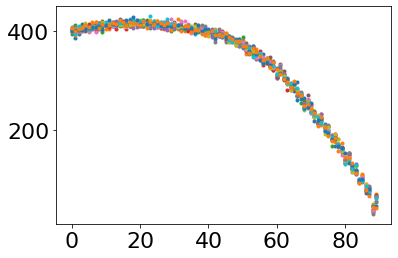

In [70]:
paths = ["../data/E_3_intensity_2500_s_run1.csv",
         "../data/E_3_intensity_2500_s_run2.csv",
         "../data/E_3_intensity_2500_s_run3.csv",
         "../data/E_3_intensity_2500_s_run4.csv",
         "../data/E_3_intensity_2500_s_run5.csv",
         "../data/E_3_intensity_2500_s_run6.csv",
         "../data/E_3_intensity_3200_s_run1.csv",
         "../data/E_3_intensity_3200_s_run2.csv",
         "../data/E_3_intensity_3200_s_run3.csv",
         "../data/E_3_intensity_3200_s_run4.csv",
         "../data/E_3_intensity_3200_s_run5.csv",
         "../data/E_3_intensity_3200_s_run6.csv"
        ]
full_data_s = np.zeros((len(paths), 90))

for i, path in enumerate(paths):
    data = np.genfromtxt(path)
    correction=2
    d = data[(180-correction):(270-correction)]
    plt.plot(deg, d, ".")
    
    full_data_s[i] = d

plt.show()

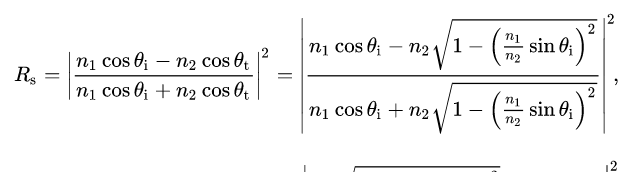

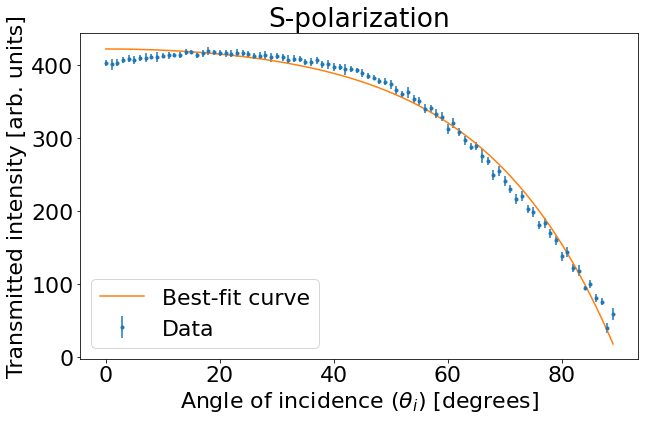

2.0296450488867297 0.03969354680843358
477.6504210255504 4.443129680206321


In [71]:
def T_s(t, n_2, A):
    
    T = t*np.pi/180 # convert to rad
    n_1 = 1
    
    top = n_1*np.cos(T) - n_2*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)
    bottom = n_1*np.cos(T) + n_2*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)
    
    Rs = np.abs(top/bottom)**2
    
    return A*(1-Rs)

mean = np.mean(full_data_s, axis=0)
err = np.std(full_data_s, axis=0)

popt, pcov = curve_fit(T_s, xdata=deg, ydata=mean, sigma=err, p0=[1.5, 600])
perr = np.diag(np.sqrt(pcov))

plt.figure(figsize=(10,6))
plt.errorbar(deg, mean, err, fmt=".", label="Data")
plt.plot(deg, T_s(deg, popt[0], popt[1]), label="Best-fit curve")
plt.title("S-polarization")
plt.xlabel(r"Angle of incidence ($\theta_i$) [degrees]")
plt.ylabel("Transmitted intensity [arb. units]")
plt.legend()
plt.show()

print(popt[0], perr[0])
print(popt[1], perr[1])

In [72]:
resid_s = (mean - T_s(deg, popt[0], popt[1]))/err

print(chi2(mean, T_s(deg, popt[0], popt[1]), err))

378.1308705483576


# P-polarization

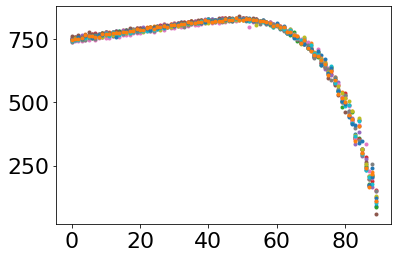

In [67]:
paths = ["../data/E_3_intensity_2500_p_run1.csv",
         "../data/E_3_intensity_2500_p_run2.csv",
         "../data/E_3_intensity_2500_p_run3.csv",
         "../data/E_3_intensity_2500_p_run4.csv",
         "../data/E_3_intensity_2500_p_run5.csv",
         "../data/E_3_intensity_2500_p_run6.csv",
         "../data/E_3_intensity_3200_p_run1.csv",
         "../data/E_3_intensity_3200_p_run2.csv",
         "../data/E_3_intensity_3200_p_run3.csv",
         "../data/E_3_intensity_3200_p_run4.csv",
         "../data/E_3_intensity_3200_p_run5.csv",
         "../data/E_3_intensity_3200_p_run6.csv"
        ]
full_data_p = np.zeros((len(paths), 90))

for i, path in enumerate(paths):
    data = np.genfromtxt(path)
    correction=1
    d = data[(180-correction):(270-correction)]
    plt.plot(deg, d, ".")
    
    full_data_p[i] = d

plt.show()

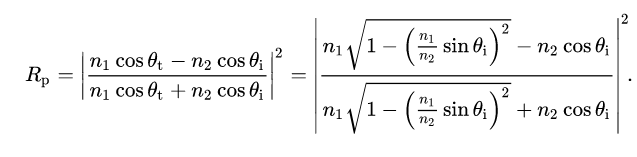

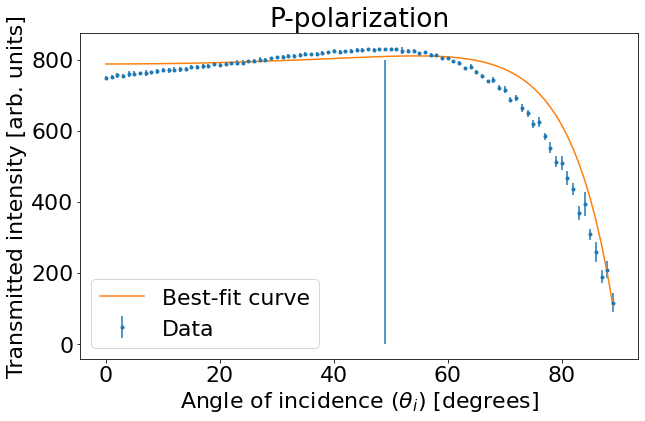

1.4017106990517245 0.06773184992581414
810.3440823134504 3.3737159340912726


In [102]:
def T_p(t, n_2, A):
    
    T = t*np.pi/180 # convert to rad
    n_1 = 1
    
    top = n_1*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2) - n_2*np.cos(T)
    bottom = n_1*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2) + n_2*np.cos(T)
    
    Rp = np.abs(top/bottom)**2
    
    return A*(1-Rp)

mean = np.mean(full_data_p, axis=0)
err = np.std(full_data_p, axis=0)

popt, pcov = curve_fit(T_p, xdata=deg, ydata=mean, sigma=err, p0=[1.5, 400])
perr = np.diag(np.sqrt(pcov))

plt.figure(figsize=(10,6))
plt.errorbar(deg, mean, err, fmt=".", label="Data")
plt.plot(deg, T_p(deg, popt[0], popt[1]), label="Best-fit curve")
plt.title("P-polarization")
plt.vlines(49, 0, 800)
plt.xlabel(r"Angle of incidence ($\theta_i$) [degrees]")
plt.ylabel("Transmitted intensity [arb. units]")
plt.legend()
plt.show()

print(popt[0], perr[0])
print(popt[1], perr[1])

In [100]:
print("brewster angle", np.arctan(popt[0]/1)*180/np.pi)

e = 0.06773184992581414*(1/(1+popt[0]**2))
print("error:", e)

brewster angle 54.49540889143255
error: 0.022845390076010146


In [101]:
loc = np.where(mean==max(mean))[0][0]
deg[loc]

49.0

In [69]:
resid_p = (mean - T_p(deg, popt[0], popt[1]))/err

def chi2(observed, expected, err):
    return np.sum((observed - expected)**2/err**2)

print(chi2(mean, T_p(deg, popt[0], popt[1]), err))

2128.10159454425


# Residuals

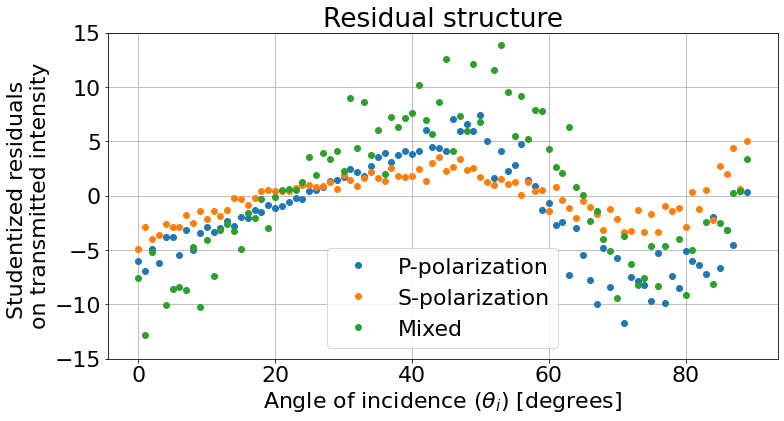

In [87]:
plt.figure(figsize=(12,6))

plt.plot(deg, resid_p, "o", label="P-polarization")
plt.plot(deg, resid_s, "o", label="S-polarization")
plt.plot(deg, resid_m, "o", label="Mixed")
plt.ylim(-15, 15)
plt.grid()

plt.title("Residual structure")
plt.xlabel(r"Angle of incidence ($\theta_i$) [degrees]")
plt.ylabel("Studentized residuals \non transmitted intensity")
plt.legend()
plt.show()